In [ ]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Deflategate

In [ ]:
football = Table.read_table('http://inferentialthinking.com/notebooks/football.csv')
football = football.drop('Team')
football.show()

In [ ]:
initials = np.append(np.ones(11) * 12.5, np.ones(4) * 13)
halftime_wts = (football.column('Blakeman')+football.column('Prioleau'))/2
football = football.with_column(
    'Team', np.char.strip(football.column('Ball'), [' 1234567890']),
    'Weight at Halftime', halftime_wts,
    'Estimate at Start', initials,
    'Drop', initials - halftime_wts
)
football.show()

In [ ]:
def difference_in_average_drop(t):
    averages = t.select('Team', 'Drop').group('Team', np.average).column(1)
    return averages.item(1) - averages.item(0)

observed = difference_in_average_drop(football)
observed

In [ ]:
group_labels = football.select('Team')
drops = football.select('Drop')

In [ ]:
shuffled_drops = drops.sample(with_replacement=False).column(0)
shuffled_tbl = group_labels.with_column('Drop', shuffled_drops)
difference_in_average_drop(shuffled_tbl)

In [ ]:
sampled_stats = make_array()

for i in np.arange(10000):
    shuffled_drops = drops.sample(with_replacement=False).column(0)
    shuffled_tbl = group_labels.with_column('Drop', shuffled_drops)
    difference_in_average_drop(shuffled_tbl)
    new_diff = difference_in_average_drop(sample)
    sampled_stats = np.append(sampled_stats, new_diff)

In [ ]:
Table().with_column('Null distribution', sampled_stats).hist()
_ = plots.plot([observed, observed], [0, 1.4])

In [ ]:
np.count_nonzero(sampled_stats >= observed)/len(sampled_stats)

## The Toast Myth

We saw the Mythbusters crew do an experiment with 48 pieces of toast, where 29 landed butter side up and 19 butter side down.  Let's see if we can figure out how likely this outcome would be, if toast was equally likely to land on either side.  In particular, we'll play a "what-if" game: what if toast was equally likely to land on both sides?  Let's simulate what would happen, under that assumption.

In [2]:
sides = make_array('Butter Side Up', 'Butter Side Down')

In [3]:
possible_outcomes = Table().with_column('Outcome', sides)

In [4]:
possible_outcomes

Outcome
Butter Side Up
Butter Side Down


In [5]:
simulated_experiment = possible_outcomes.sample(48)

In [6]:
simulated_experiment

Outcome
Butter Side Up
Butter Side Up
Butter Side Down
Butter Side Up
Butter Side Up
Butter Side Down
Butter Side Down
Butter Side Down
Butter Side Down
Butter Side Down


In [7]:
simulated_experiment.group('Outcome')

Outcome,count
Butter Side Down,27
Butter Side Up,21


In [8]:
def count_up(sample):
    counts = sample.group('Outcome').where('Outcome', 'Butter Side Up')
    number_up = counts.column('count').item(0)
    return number_up

In [9]:
count_up(simulated_experiment)

21

## Simulation

Above we saw how to simulate an episode of the TV show (i.e., one experiment), under the "what-if" assumption that toast is equally likely to land on both sides.  Now we're going to repeat the simulation 10000 times, and keep track of the statistic (the number of times the toast landed butter-side-up) we get from each simulated TV episode.

In [10]:
counts = make_array()
for i in np.arange(10000): # 10000 repetitions
    one_simulated_episode = possible_outcomes.sample(48)
    number_up = count_up(one_simulated_episode)
    counts = np.append(counts, number_up)
results = Table().with_column('Number that landed butter-side-up', counts)

In [11]:
results

Number that landed butter-side-up
22
29
18
23
26
26
32
26
26
27


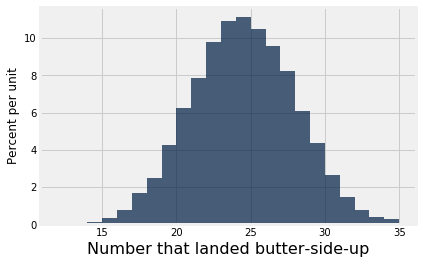

In [12]:
results.hist(bins=np.arange(12,36,1))

In [13]:
results.where('Number that landed butter-side-up',
              are.above_or_equal_to(29)).num_rows / 10000

0.0994